# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import analysis_util

# Data

In [2]:
subreddit = 'indoorbouldering'
period = '2015-01-01-2022-01-01'

path_post='../data/raw/'+ subreddit +'_'+  period +'/'+ subreddit + "_posts.csv"
path_comment = '../data/raw/'+ subreddit +'_'+  period +'/'+ subreddit + "_comments.csv"

df_comments=analysis_util.read_comments(path_comment)
df_post=analysis_util.read_posts(path_post)
df_all_nodes=analysis_util.get_all_nodes(df_post,df_comments)

G_di = analysis_util.get_DiGraph(df_post,df_comments,df_all_nodes)
G = analysis_util.get_graph(df_post,df_comments,df_all_nodes)
G_big = analysis_util.get_biggest_component(G)

df_comment_post = analysis_util.get_comment_post_date(df_comments,df_post)
df_authors = analysis_util.get_authors(G,df_all_nodes,df_comments,df_comment_post)

# PLOTS

In [32]:
color_map = []
for node in G_big:
    if type(node) == float: print(node)
    if G_big.nodes[node]['type'] == 'both': color_map.append('green')
    elif G_big.nodes[node]['type'] == 'commenter': color_map.append('red')
    else: color_map.append('blue')

widths = [G_big[u][v]['weight'] for u,v in G_big.edges()]

In [89]:
df_authors.mean_score
node_sizes = []
for node in G_big:
    if np.isnan(df_authors.mean_score[node]):
        node_sizes.append(8)
    else:
        node_sizes.append(df_authors.mean_score[node]*3.8)

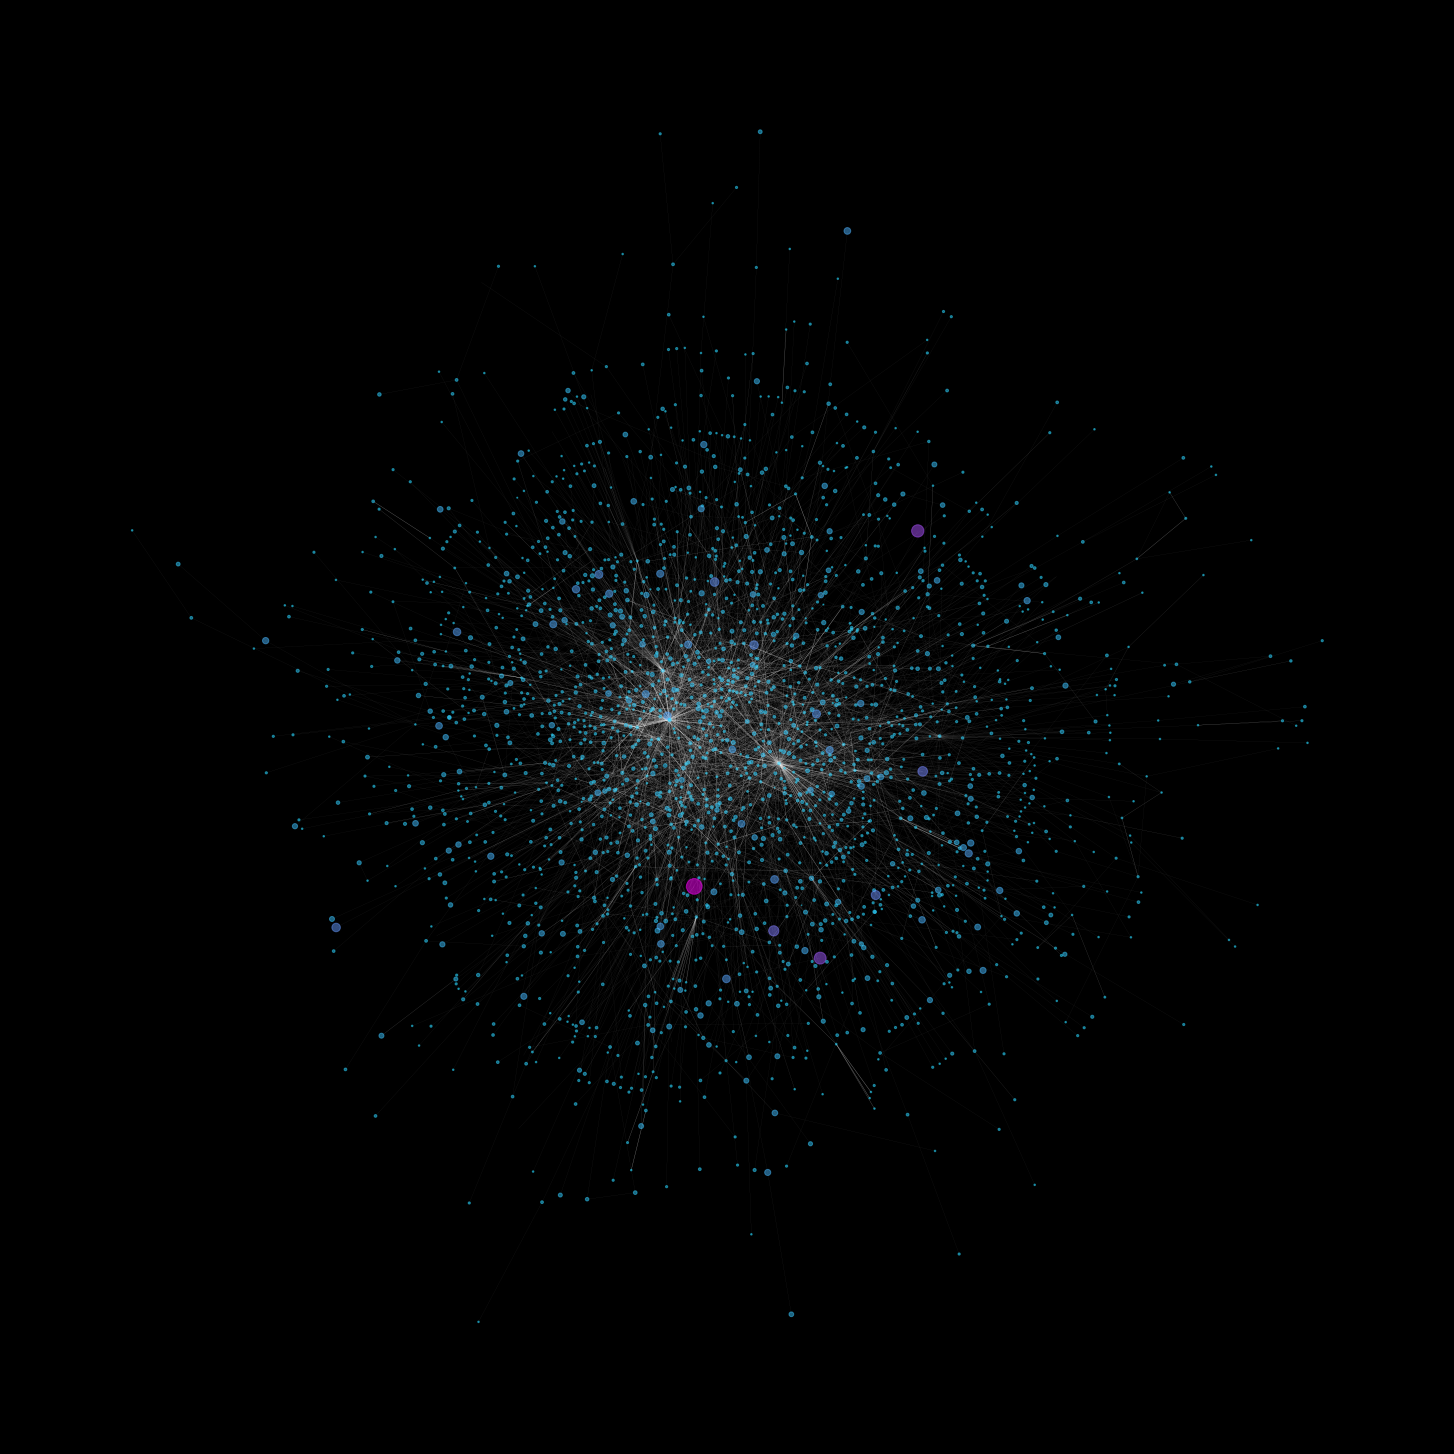

In [78]:
# make cmap
cmap = plt.cm.get_cmap('cool')

#map node sizes to cmap
norm = plt.Normalize(min(node_sizes), max(node_sizes))
colors = [cmap(norm(value)) for value in node_sizes]

fig=plt.figure(figsize=(20,20))

pos = nx.spring_layout(G_big, 
    k=0.08, 
    iterations=50)

nx.draw(G_big, 
    node_color=colors,
    edge_color='white',
    with_labels=False,
    pos=pos,
    node_size=node_sizes,
    alpha=0.5,
    width=0.05*np.array(widths),)

fig.set_facecolor("black")
plt.show()

/home/pelle/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


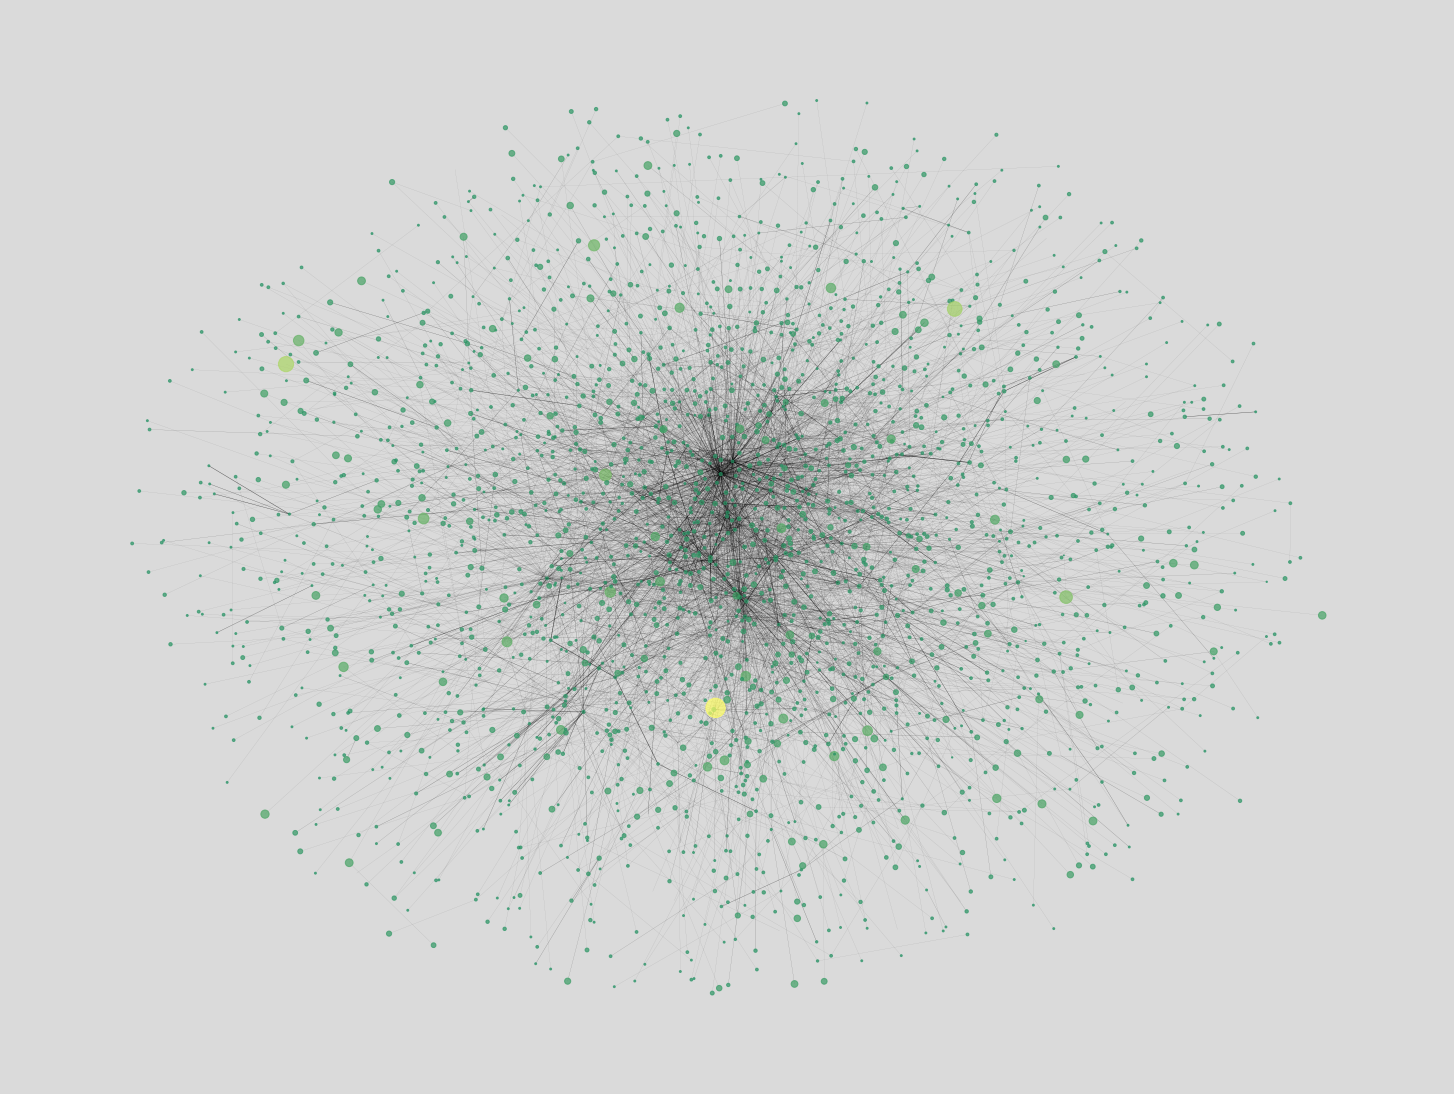

<module 'matplotlib.pyplot' from '/home/pelle/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [90]:
# make cmap
cmap = plt.cm.get_cmap('summer')

#map node sizes to cmap
norm = plt.Normalize(min(node_sizes), max(node_sizes))
colors = [cmap(norm(value)) for value in node_sizes]

fig=plt.figure(figsize=(20,15))

pos = nx.spring_layout(G_big, 
    k=0.15, 
    iterations=50)

nx.draw(G_big, 
    node_color=colors,
    edge_color='black',
    with_labels=False,
    pos=pos,
    node_size=node_sizes,
    alpha=0.7,
    width=0.05*np.array(widths),)

fig.set_facecolor([0.8549,0.8549,0.8549])

plt.show()
plt

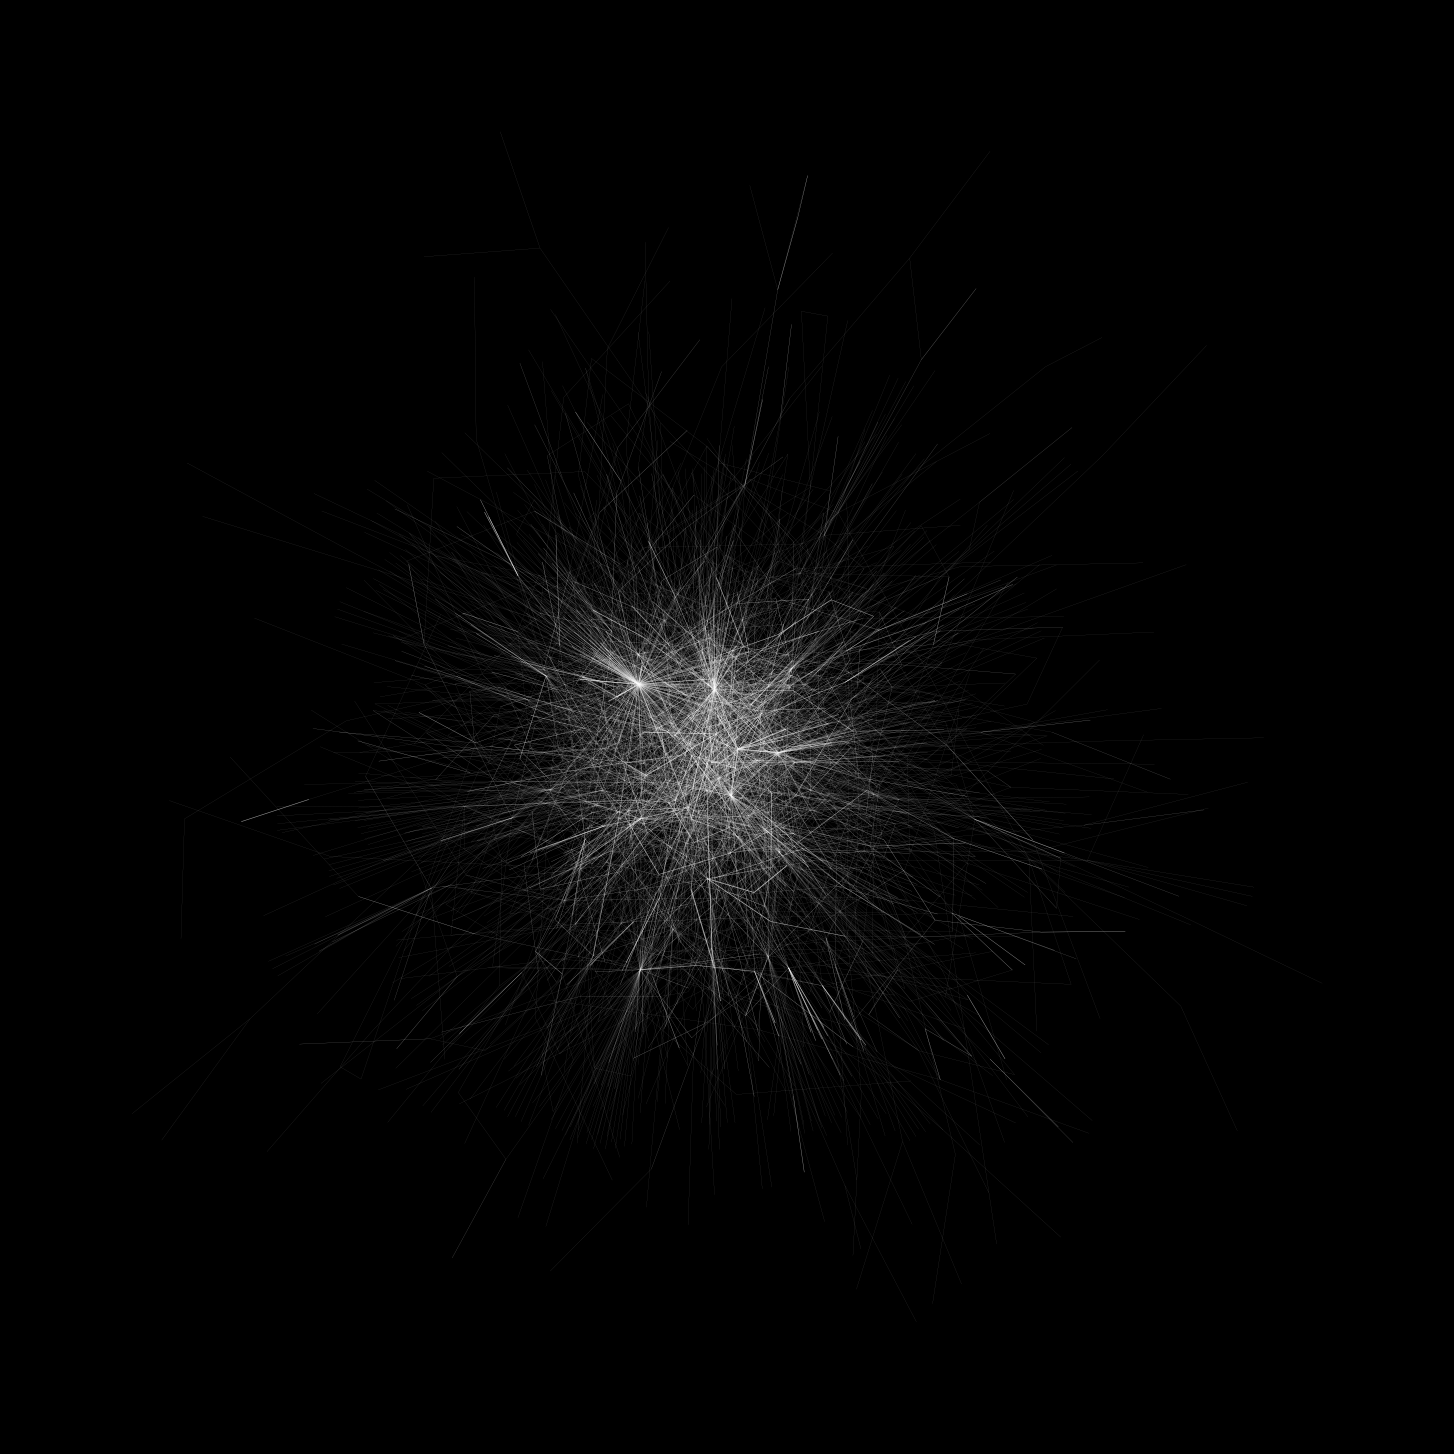

In [80]:
# make cmap
cmap = plt.cm.get_cmap('summer')

#map node sizes to cmap
norm = plt.Normalize(min(node_sizes), max(node_sizes))
colors = [cmap(norm(value)) for value in node_sizes]

fig=plt.figure(figsize=(20,20))

pos = nx.spring_layout(G_big, 
    k=0.08, 
    iterations=50)

nx.draw(G_big, 
    node_color='white',
    edge_color='white',
    with_labels=False,
    pos=pos,
    node_size=0,
    alpha=0.6,
    width=0.08*np.array(widths),)

fig.set_facecolor("black")
plt.show()